<a href="https://colab.research.google.com/github/deepakawl/teaching/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Manager's dilemma

Imagine you are a marketing manager. You have historical data on Ad spend and Sales. You want to understand the relationship between Ad spend and Sales and try to best estimate response to following questions:

1. Whether Ad spend helps driving sales?
2. Due to budget constraint, you completely stop Ad spend. How much would be the estimated sales in such scenario?
3. How much is the impact on sales if you increase the Ad spend by $10,000?
4. How much sales target to set in the next period given the Ad spend budget.

In [82]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression

In [23]:
# read csv file from github permanent link
df = pd.read_csv('https://raw.githubusercontent.com/deepakawl/teaching/main/adsales.csv')
df.head()

,period,sales,advt
0,1,184.4,30
1,2,279.1,40
2,3,244.0,40
3,4,314.2,50
4,5,382.2,60


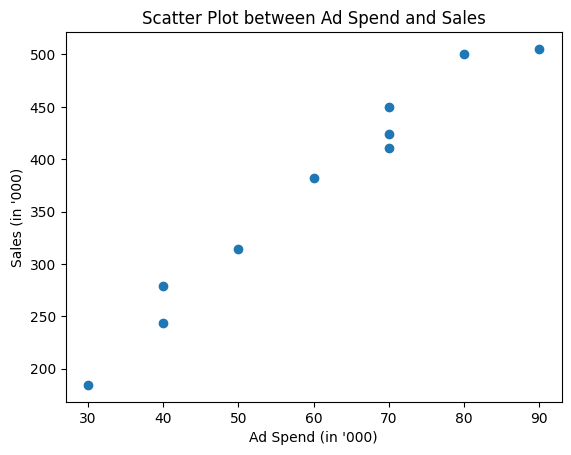

In [109]:
# Scatter plot between adspend and sales

plt.scatter(df['advt'], df['sales'])

plt.xlabel("Ad Spend (in '000)")
plt.ylabel("Sales (in '000)")
plt.title("Scatter Plot between Ad Spend and Sales")
plt.show()

In [119]:
# Add a constant to the independent variable for the intercept
X = sm.add_constant(df['advt'])

# Fit the linear regression model
model = sm.OLS(df['sales'], X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     251.2
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           2.51e-07
Time:                        23:09:34   Log-Likelihood:                -43.239
No. Observations:                  10   AIC:                             90.48
Df Residuals:                       8   BIC:                             91.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3424     21.983      1.653      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


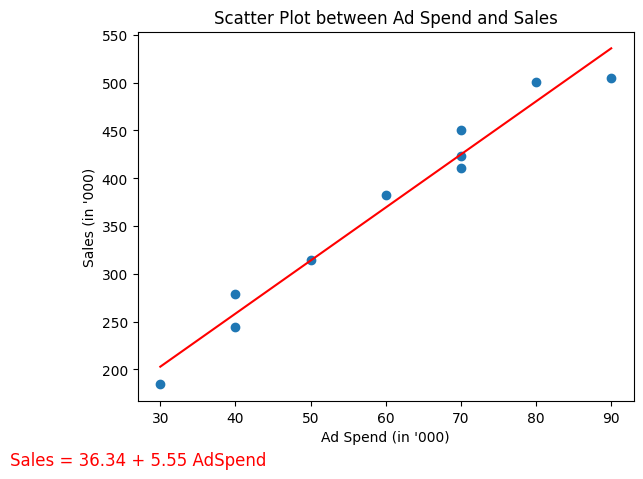

In [130]:
# Show regression line and equation on scatter plot

predictions = model.predict(X)

plt.scatter(df['advt'], df['sales'])
plt.plot(df['advt'], predictions, label='Regression Line', color='red')

plt.xlabel("Ad Spend (in '000)")
plt.ylabel("Sales (in '000)")
plt.title("Scatter Plot between Ad Spend and Sales")

# Add equation of the line
equation = f"Sales = {model.params[0]:.2f} + {model.params[1]:.2f} AdSpend"
plt.text(10, 100, equation, fontsize = 12, color = 'red')

plt.show()

### 1. Whether Ad spend helps driving sales?

In [37]:
print('Coefficient for Ad spend:', model.params['advt'].round(2))
print('P-value for Ad spend:', model.pvalues['advt'].round(4))

Coefficient for Ad spend: 5.55
P-value for Ad spend: 0.0


### 2. Due to budget constraint, you completely stop Ad spend. How much would be the estimated sales in such scenario?

In [103]:
# Predict a new value for X = 0
new_x = [1, 0]
pred_x = model.predict(new_x)

print(f"If Ad spend is ${new_x[1]}, then expected sales would be ${(pred_x*1000).round(2)[0]}")

If Ad spend is $ 0, then expected sales would be $36342.35


### 3. How much is the impact on sales if you increase the Ad spend by $10,000?

In [104]:
# Predict a new value for X = 10
new_x = [1, 10]
pred_x = model.predict(new_x)

print(f"If Ad spend is ${new_x[1]}, then expected sales would be ${(pred_x*1000).round(2)[0]}")

If Ad spend is $10, then expected sales would be $91845.29


### 4. How much sales target to set in the next period given the Ad spend budget is $70,000.

In [105]:
# Predict a new value for X = 70
new_x = [1, 70]
pred_x = model.predict(new_x)

print(f"If Ad spend is ${new_x[1]}, then expected sales would be ${(pred_x*1000).round(2)[0]}")

If Ad spend is $70, then expected sales would be $424862.94
